In [41]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

import CalculatedFieldSubroutines as cfs

from pandasgui import show

import os

import warnings

In [42]:
warnings.filterwarnings( 'ignore' )

In [43]:
def origin_dir():

    home_dir_list = os.listdir( '/home' )

    for dir in home_dir_list:

        if '_linux' in dir:

            path = f'/home/{dir}/Desktop/TDMprivate'

            if not os.path.exists( path ):

                raise Exception( 'TDMprivate folder does not exist. TDMprivate folder must exist on Desktop. Notify Ryan or ' +
                                 'Vincent if this message appears.' )

            else:

                return path

In [44]:
metadata_df = pd.read_csv( f'{ origin_dir() }/metadata/metadata.csv' )

In [45]:
red_route_gmID_list  = metadata_df[ metadata_df[ 'Route' ] == 'Red' ][ 'groupMetadataID' ].tolist()

green_route_gmID_list  = metadata_df[ metadata_df[ 'Route' ] == 'Green' ][ 'groupMetadataID' ].tolist() 

blue_route_gmID_list  = metadata_df[ metadata_df[ 'Route' ] == 'Blue' ][ 'groupMetadataID' ].tolist()

In [46]:
best_pose_file_string = '_apollo_sensor_gnss_best_pose'

#

red_route_best_pose_df_list = []

for gmID in red_route_gmID_list:

    current_gmID_best_pose_df = pd.read_csv( f'{ origin_dir() }/data/{ gmID }/{ best_pose_file_string }/{ gmID + best_pose_file_string }.csv' )

    current_gmID_best_pose_df = current_gmID_best_pose_df.sort_values( 'time' )

    red_route_best_pose_df_list.append( current_gmID_best_pose_df )

green_route_best_pose_df_list = []

for gmID in green_route_gmID_list:

    current_gmID_best_pose_df = pd.read_csv( f'{ origin_dir() }/data/{ gmID }/{ best_pose_file_string }/{ gmID + best_pose_file_string }.csv' )

    current_gmID_best_pose_df = current_gmID_best_pose_df.sort_values( 'time' )

    green_route_best_pose_df_list.append( current_gmID_best_pose_df )

blue_route_best_pose_df_list = []

for gmID in blue_route_gmID_list:

    current_gmID_best_pose_df = pd.read_csv( f'{ origin_dir() }/data/{ gmID }/{ best_pose_file_string }/{ gmID + best_pose_file_string }.csv' )

    current_gmID_best_pose_df = current_gmID_best_pose_df.sort_values( 'time' )

    blue_route_best_pose_df_list.append( current_gmID_best_pose_df )

In [48]:
reference_blue_best_pose_df = blue_route_best_pose_df_list[ 0 ]

In [49]:
cfs.ProgressAlongRoute( reference_blue_best_pose_df, reference_blue_best_pose_df )

In [51]:
cfs.ProgressAlongRoute( blue_route_best_pose_df_list[ 1 ], reference_blue_best_pose_df )

In [52]:
show( blue_route_best_pose_df_list[ 1 ] )

PandasGUI INFO — pandasgui.gui — Opening PandasGUI


In [47]:
blue_route_best_pose_df_list[ 0 ].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1756 entries, 0 to 1755
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   heightMsl               1756 non-null   float64
 1   groupMetadataID         1756 non-null   object 
 2   latitudeStdDev          1756 non-null   float64
 3   longitude               1756 non-null   float64
 4   solType                 1756 non-null   object 
 5   extendedSolutionStatus  1756 non-null   int64  
 6   time                    1756 non-null   int64  
 7   heightStdDev            1756 non-null   float64
 8   solStatus               1756 non-null   object 
 9   latitude                1756 non-null   float64
 10  longitudeStdDev         1756 non-null   float64
 11  numSatsInSolution       1756 non-null   int64  
dtypes: float64(6), int64(3), object(3)
memory usage: 164.8+ KB


In [38]:
min( blue_route_best_pose_df_list[ 2 ][ 'latitude' ] )

39.31899250557216

In [7]:
latitude_array = np.array( blue_route_best_pose_df_list[ 0 ][ 'latitude' ] )

longitude_array = np.array( blue_route_best_pose_df_list[ 0 ][ 'longitude' ] )

In [10]:
latitude_diff_array = np.diff( latitude_array )

longitude_diff_array = np.diff( longitude_array )

In [15]:
print( np.min( np.sqrt( latitude_diff_array ** 2 + longitude_diff_array ** 2 ) ) )

0.0


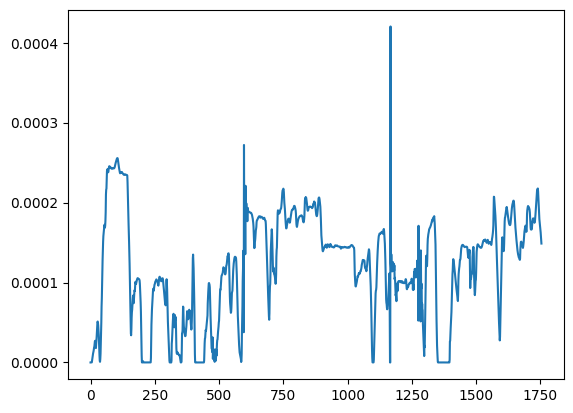

In [11]:
plt.plot( np.sqrt( latitude_diff_array ** 2 + longitude_diff_array ** 2 ) )

plt.show()

In [40]:
list1 = [ 0, 1, 2, 3, 4, 5 ]

print( list1 )

print( list1[ : -1 ] )

[0, 1, 2, 3, 4, 5]
[0, 1, 2, 3, 4]
